In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [94]:
path2target = '/Users/y1u0d2/desktop/Lab/result/sf/Si/04'
filename = 'sf_4.csv'

In [95]:
df = pd.read_csv(os.path.join(path2target, filename))

In [96]:
radial_columns = list(filter(lambda x: '_rs-' in x, df.columns))
angular_columns = list(filter(lambda x: '_zeta-' in x, df.columns))

print('number of radial columns', len(radial_columns))

number of radial columns 25


In [97]:
radial_df = df[radial_columns].copy()
angular_df = df[angular_columns].copy()

<AxesSubplot:>

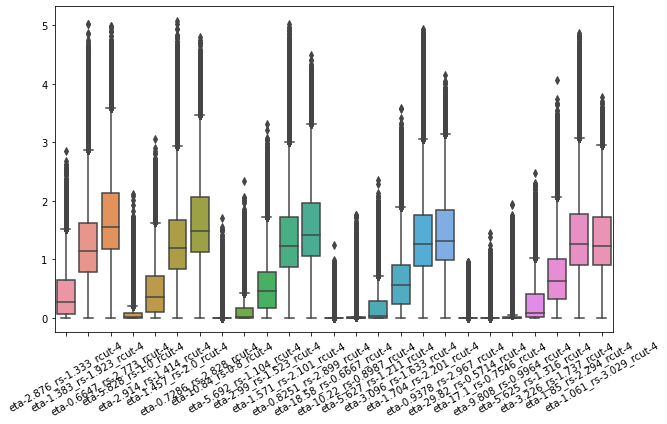

In [99]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.xticks(rotation=30)

sns.boxplot(data=radial_df, showfliers=True)


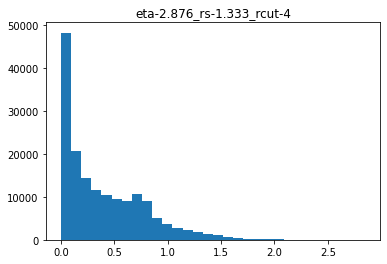

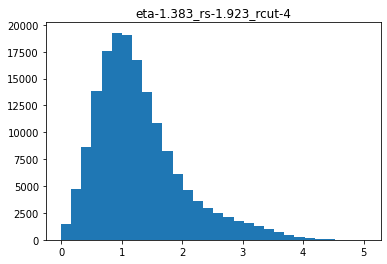

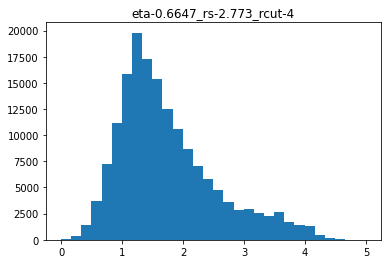

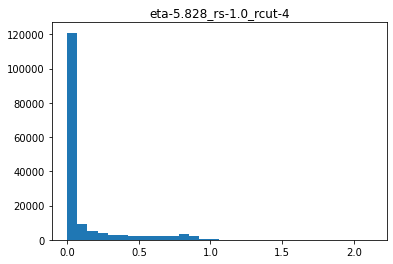

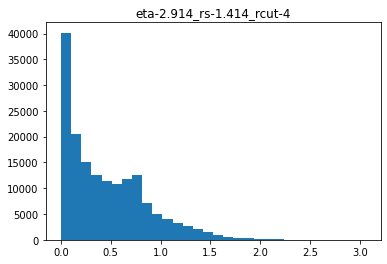

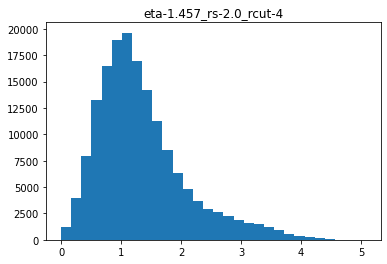

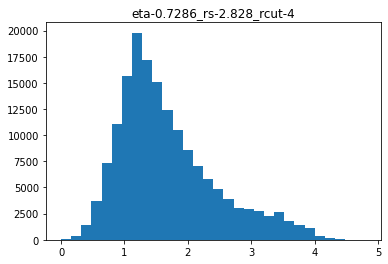

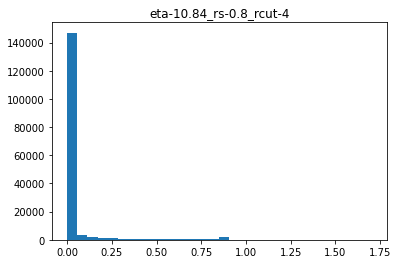

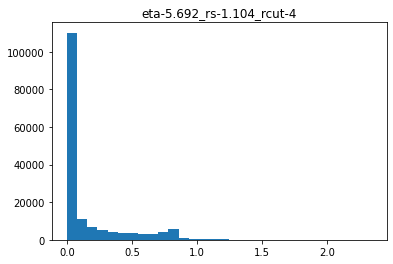

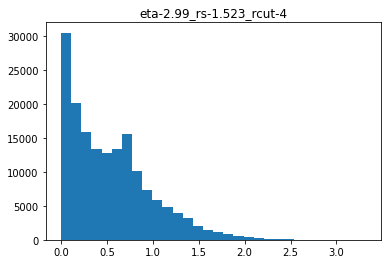

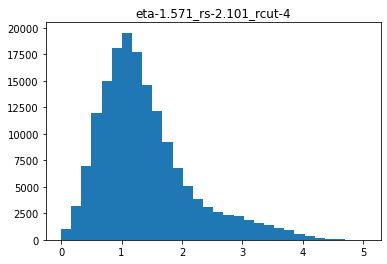

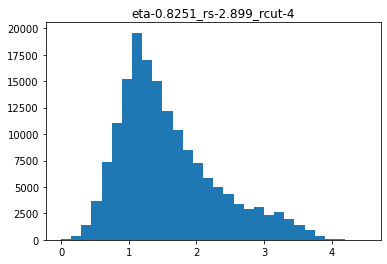

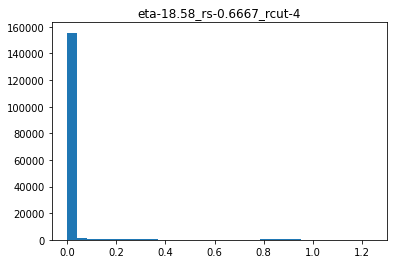

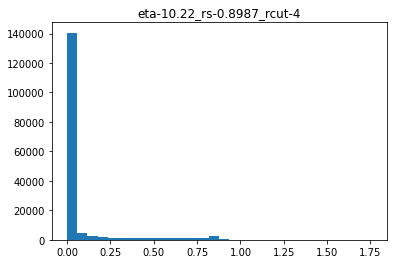

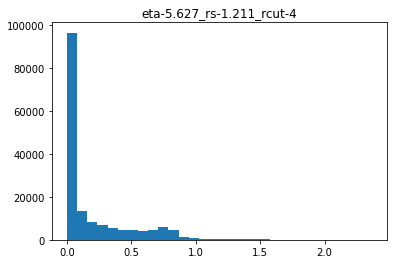

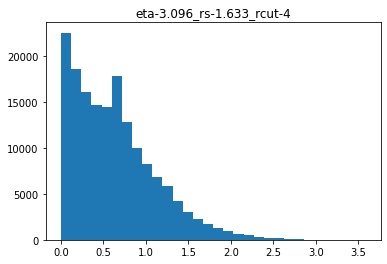

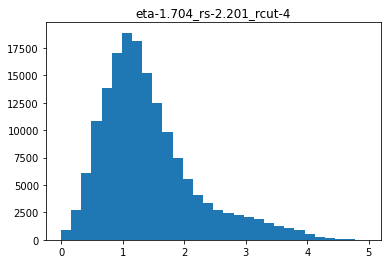

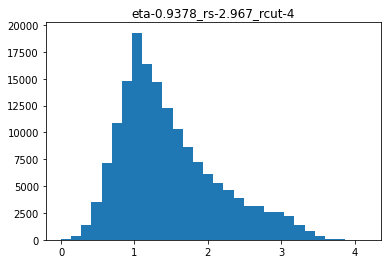

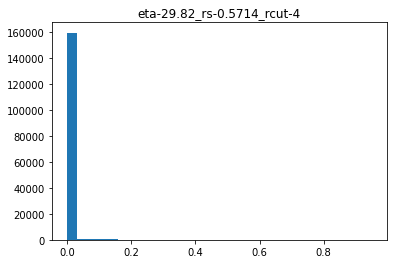

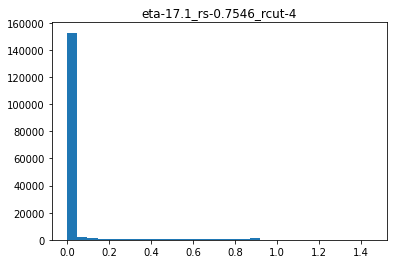

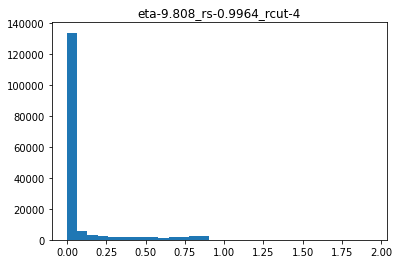

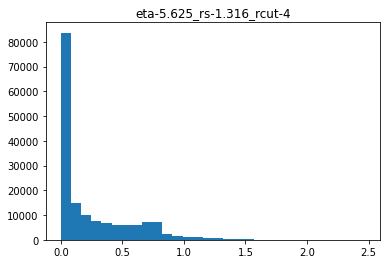

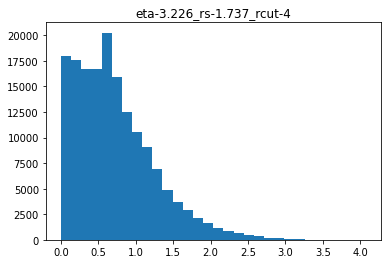

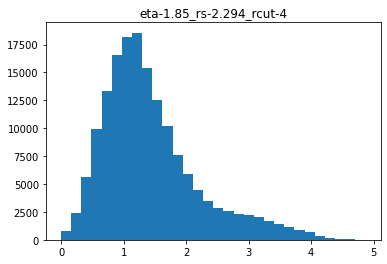

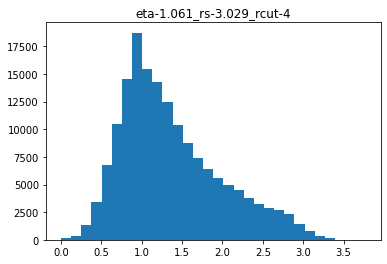

In [100]:
for column in radial_df.columns:
    plt.title(column)
    plt.hist(radial_df[column].values, bins=30)
    plt.show()

In [101]:
# radial_df['mpid'] = df['structure_id']
# radial_df

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(radial_df)

scaler.transform(radial_df)
scaled_radial_df = pd.DataFrame(data=scaler.transform(radial_df), columns=radial_df.columns)

In [112]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


features = scaled_radial_df
# features = radial_df[list(fs.get_feature_names_out())]
target = df['fx'] 

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)

# apply feature selection
X_selected = fs.fit_transform(radial_df, target)
print(X_selected.shape)

(163494, 10)


In [113]:
fs.get_feature_names_out()

array(['eta-2.876_rs-1.333_rcut-4', 'eta-2.914_rs-1.414_rcut-4',
       'eta-5.692_rs-1.104_rcut-4', 'eta-2.99_rs-1.523_rcut-4',
       'eta-18.58_rs-0.6667_rcut-4', 'eta-5.627_rs-1.211_rcut-4',
       'eta-3.096_rs-1.633_rcut-4', 'eta-29.82_rs-0.5714_rcut-4',
       'eta-5.625_rs-1.316_rcut-4', 'eta-3.226_rs-1.737_rcut-4'],
      dtype=object)

<AxesSubplot:>

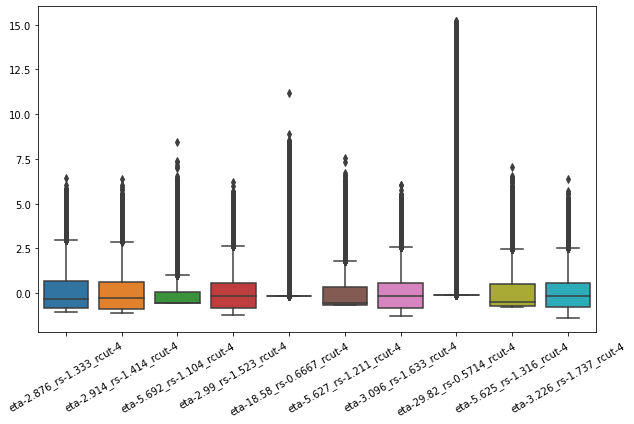

In [114]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.xticks(rotation=30)

sns.boxplot(data=scaled_radial_df[list(fs.get_feature_names_out())], showfliers=True)

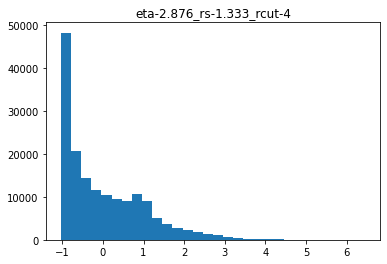

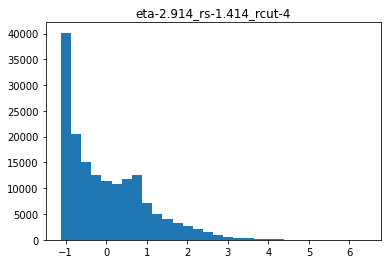

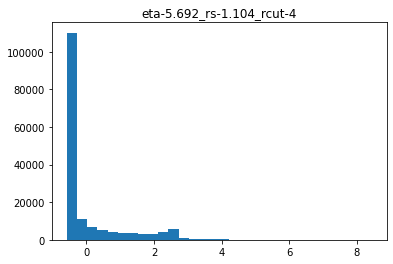

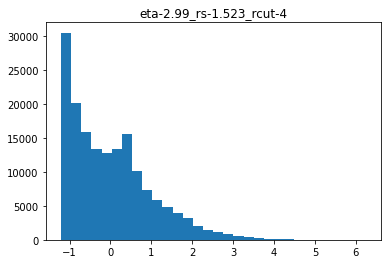

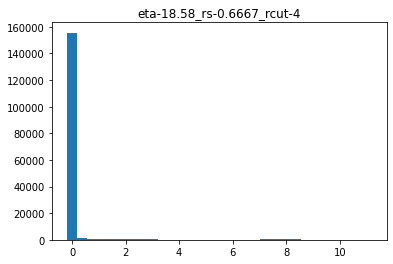

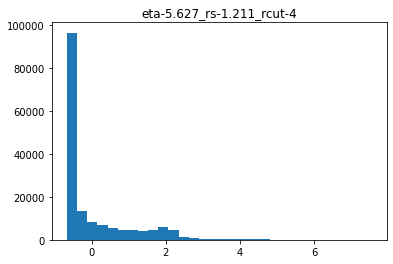

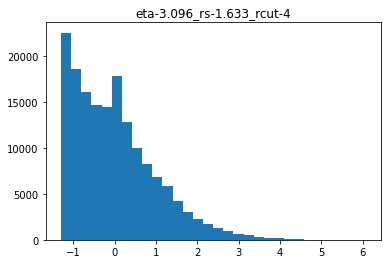

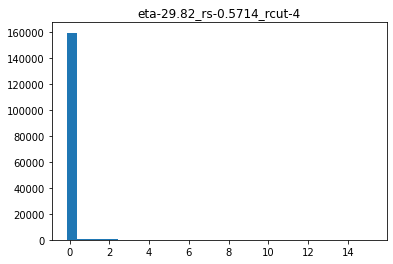

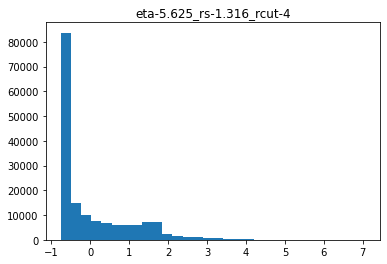

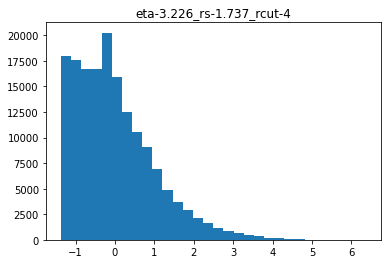

In [115]:
for column in scaled_radial_df[list(fs.get_feature_names_out())].columns:
    plt.title(column)
    plt.hist(scaled_radial_df[column].values, bins=30)
    plt.show()

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train,X_test,y_train,y_test = train_test_split(features, target, random_state=42, test_size=0.2)
tree = RandomForestRegressor(max_depth=3, random_state=0)

tree.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=0)

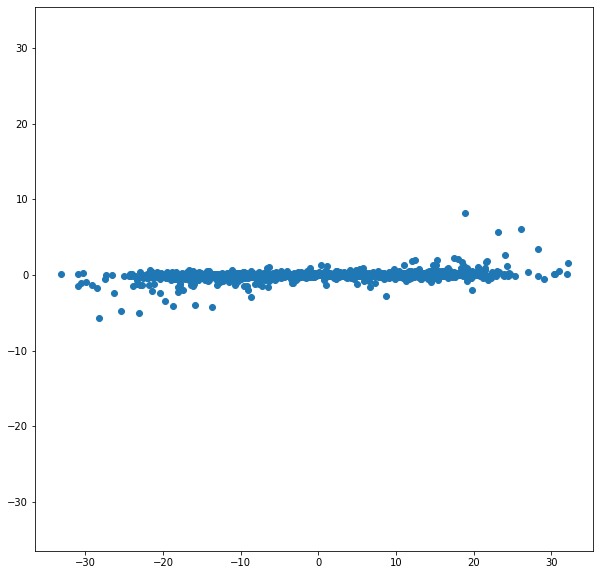

In [106]:
fig = plt.figure(figsize=(10,10))

train_predicted = tree.predict(X_train)
max = np.hstack((y_train, train_predicted)).max()
min = np.hstack((y_train, train_predicted)).min()
plt.xlim(min*1.1, max*1.1)
plt.ylim(min*1.1, max*1.1)
plt.scatter(y_train, train_predicted)

In [107]:
tree.score(X_test, y_test)

-0.012297492505607188

In [108]:
# for column in radial_columns:
#     fig = plt.figure(figsize=(8,6))
#     ax = fig.add_subplot(111)
#     sns.stripplot(data=radial_df, x=column, y='mpid')
#     fig.show()
    
    # plt.title(column)
    # plt.hist(radial_df[column].values, bins=30)
    # plt.show()

ValueError: min() arg is an empty sequence

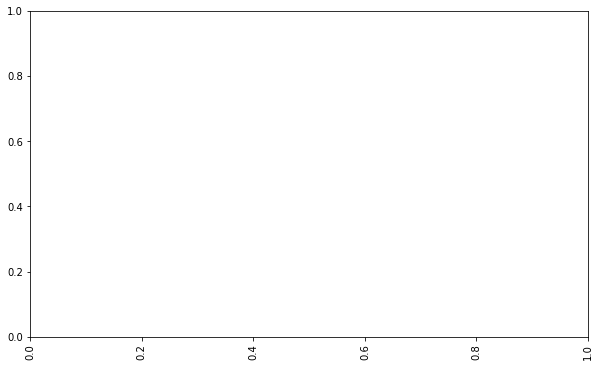

In [109]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.xticks(rotation=90)

sns.boxplot(data=angular_df, showfliers=True)

In [ ]:
for column in angular_df.columns:
    plt.title(column)
    plt.hist(angular_df[column].values, bins=30)
    plt.show()